# 머신러닝 4주차 과제
### KNN & KDE(커널 밀도 추정)

1. knn에서 weights=’distance’로 준 경우와 ‘uniform’(default)인 경우를 비교하라

In [1]:
import seaborn as sns
data=sns.load_dataset('iris') 
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
data.shape

(150, 5)

In [3]:
# species 인코딩
from sklearn.preprocessing import LabelEncoder
import numpy as np 
classle=LabelEncoder() 

# 라벨인코딩
data['species'] =classle.fit_transform(data['species'].values) 

In [4]:
# 트테분리
X = data.drop('species', axis=1)

In [5]:
y = data['species']

In [6]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [7]:
# 스케일링
from sklearn.preprocessing import StandardScaler  
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)    
X_test_std=sc.transform(X_test)      

In [8]:
# KNN
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train_std,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 산점도 표현

In [9]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X = iris.data 
y = iris.target

from sklearn.preprocessing import StandardScaler  
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)    

In [10]:
# 시각화를 위해 pca로 2차원으로 줄임
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [11]:
# # 트테분리
# from sklearn.model_selection import train_test_split 
# X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y) 

In [12]:
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

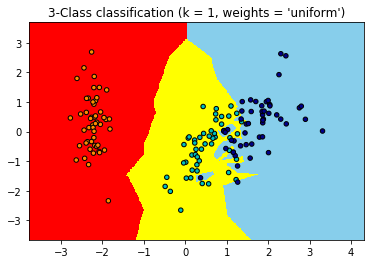

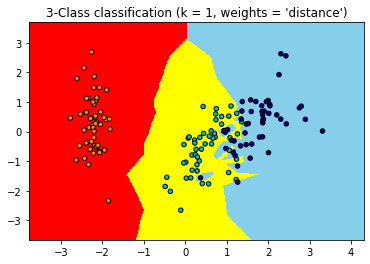

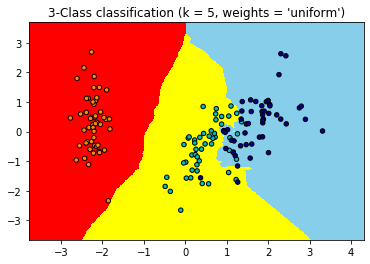

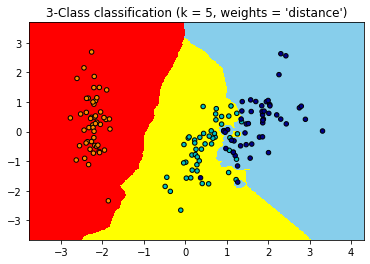

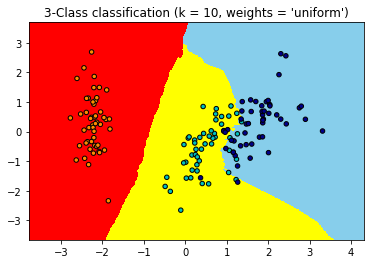

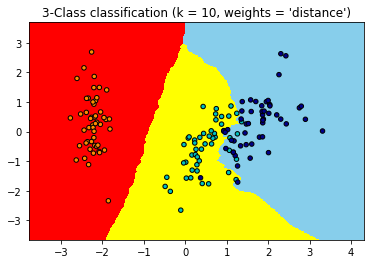

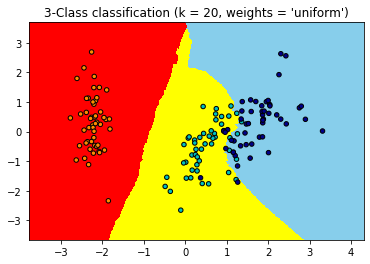

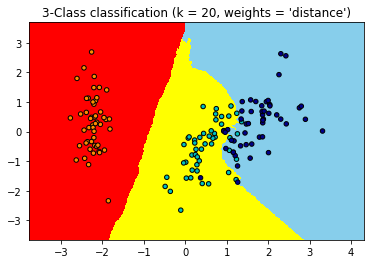

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix

# k = 5
h = .02  # step size in the mesh

cmap_light = ListedColormap(['red', 'yellow', 'skyblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# weight 다르게 해서 찾기
for k in [1, 5, 10, 20]:
    for weights in ['uniform', 'distance']:
        clf = neighbors.KNeighborsClassifier(algorithm='auto', metric='minkowski',
                         metric_params=None, n_jobs=-1, p=2,
                        n_neighbors = k, weights=weights)
        clf.fit(X, y)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
        
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (k, weights))

plt.show()

## 성능측정

In [14]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X = iris.data 
y = iris.target

from sklearn.preprocessing import StandardScaler  
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)    

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y) 

In [15]:
# weighted 함수 직접 정의
def f(x):
    return(1/10*x)

In [16]:
from sklearn.metrics import accuracy_score, f1_score    
for k in [1, 5, 10, 20]:
    for weights in ['uniform', 'distance', f]:
        clf = neighbors.KNeighborsClassifier(algorithm='auto', metric='minkowski',
                         metric_params=None, n_jobs=-1, p=2,
                        n_neighbors = k, weights=weights)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(str(k) + str(weights))
        conf=confusion_matrix(y_test, pred)
        print(conf)
        print('accuracy_score : ' + str(accuracy_score(y_test,pred)))
        print('f1_score : ' + str(f1_score(y_test,pred, average=None)))
        print('----')
    print('----------------------------------')

1uniform
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
accuracy_score : 0.9555555555555556
f1_score : [1.         0.93333333 0.93333333]
----
1distance
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
accuracy_score : 0.9555555555555556
f1_score : [1.         0.93333333 0.93333333]
----
1<function f at 0x000001E900433B88>
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
accuracy_score : 0.9555555555555556
f1_score : [1.         0.93333333 0.93333333]
----
----------------------------------
5uniform
[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
accuracy_score : 0.9333333333333333
f1_score : [1.         0.89655172 0.90322581]
----
5distance
[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
accuracy_score : 0.9333333333333333
f1_score : [1.         0.89655172 0.90322581]
----
5<function f at 0x000001E900433B88>
[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
accuracy_score : 0.9333333333333333
f1_score : [1.         0.89655172 0.90322581]
----
----------------------------------
10uniform
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
accuracy_score : 0.9333333333

과제 2. 교재의 데이터를 이용하여 bandwidth( )를 조절하여 그 효과를 논의하고 ‘gaussian’ 이외의 kernel를 적용하여 차이를 비교하라.

In [19]:
import matplotlib.pyplot as plt 
import numpy as np      
import seaborn as sns
iris=sns.load_dataset('iris') 

from sklearn import neighbors, datasets
X = iris.drop('species', axis=1) 
y=iris['species']   

xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape

In [20]:
X['sepal_length'].values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

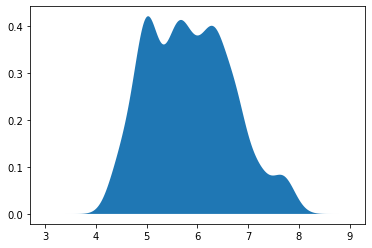

In [21]:
# 커널 밀도 추정
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx) # iris를 학습시킴

xx_d = np.linspace(3, 9, 1000) # 임의의 데이터 1000개 생성
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
# score_sample : log density 계산
plt.fill_between(xx_d, np.exp(logprob)) # exp 씌워서 다시 원래값으로

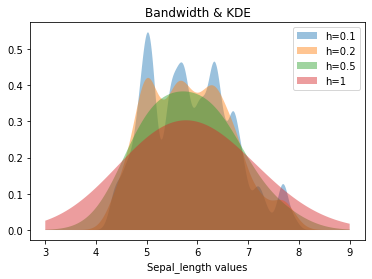

In [22]:
for i in [0.1, 0.2, 0.5, 1]:    
    kd=KernelDensity(bandwidth=i, kernel='gaussian')
    kd.fit(xx)
    xx_d = np.linspace(3, 9, 1000)
    logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
    plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
    plt.xlabel('Sepal_length values')
    plt.legend(['h=0.1', 'h=0.2', 'h=0.5', 'h=1'])
    plt.title('Bandwidth & KDE')
plt.show()

----------------------------------------------------------
-12177.093379629921
-4889.118105860423
-2606.3077977845965
-2068.456614524518


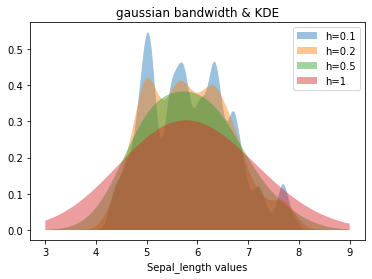

----------------------------------------------------------
-inf
-inf
-inf
-inf


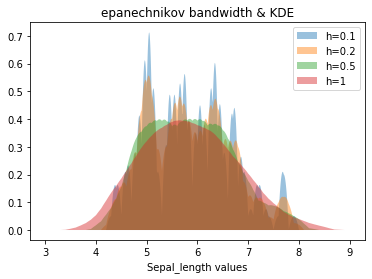

----------------------------------------------------------
-4387.07886363484
-3153.211675199768
-2315.1462231837213
-2056.0262281430905


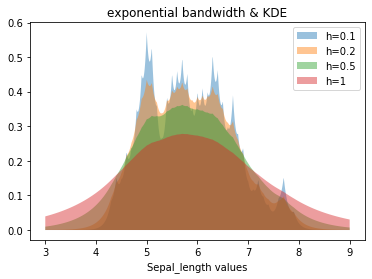

----------------------------------------------------------
-inf
-inf
-inf
-inf


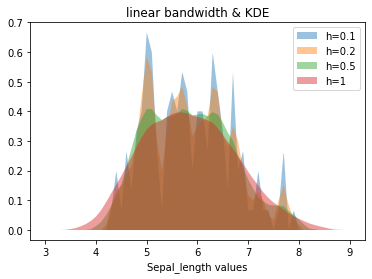

In [23]:
for j in ['gaussian', 'epanechnikov', 'exponential', 'linear']:
    print('----------------------------------------------------------')
    for i in [0.1, 0.2, 0.5, 1]:    
        kd=KernelDensity(bandwidth=i, kernel=j)
        kd.fit(xx)
        xx_d = np.linspace(3, 9, 1000)
        logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
        plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
        plt.xlabel('Sepal_length values')
        plt.legend(['h=0.1', 'h=0.2', 'h=0.5', 'h=1'])
        plt.title(str(j) + ' ' + 'bandwidth & KDE')
        print(kd.score(xx_d.reshape(-1, 1))) # 총 로그 가능도
    plt.show()

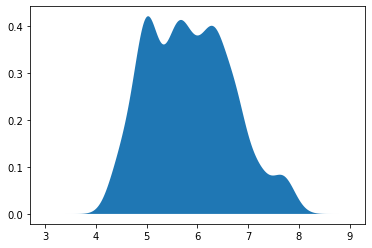

In [24]:
import matplotlib.pyplot as plt 
import numpy as np      

from sklearn import neighbors, datasets
X = iris.drop('species', axis=1) 
y=iris['species']   

xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape

# 커널 밀도 추정
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx) # kde로 아이리스의 커널밀도함수를 구함. 

xx_d = np.linspace(3, 9, 1000) # 임의의 데이터 1000개 생성
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # 데이터에 대한 로그 밀도 모델 평가
# score_sample : log density 계산
plt.fill_between(xx_d, np.exp(logprob)) # exp 씌워서 다시 원래값으로

In [25]:
kd.score(xx_d.reshape(-1, 1)) # 모델 아래 총 로그 확률밀도

-4889.118105860423